Content:

1. [Load and Check Data](#1)
2. [Variables and EDA](#2)
    * [Categorical Variable](#3)
    * [Numerical Variable](#4)
    * [Mean values for each category](#6)
4. [Dealing With Missing Values](#6)
5. [Label Encoding](#7)
    * [New Labels](#8)
6. [Target Variable Status](#9)   
7. [Dealing with Imbalancing ](#10)  
6. [Building Model](#11)   
    * [Random Forest ](#12)
8. [Explain Prediction by SHAP](#13)
    * [An Individuals Shapley Values](#14) 
    * [Whole Dataset Shapley Values](#14) 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

<a id = "1" ></a><br>
# Load and Check Data

In [4]:
data = pd.read_csv("loan_data_1.csv")

In [5]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
data.drop(["Unnamed: 0", "Loan_ID"], axis=1, inplace=True)

In [7]:
data.shape

(381, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          375 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    369 non-null    float64
 6   CoapplicantIncome  363 non-null    float64
 7   LoanAmount         373 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(5), object(7)
memory usage: 35.8+ KB


<a id = "2" ></a><br>
# Variables and EDA

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,369.000000,363.000000,373.000000,370.000000,351.000000
mean,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


<a id = "3" ></a><br>
## Categorical Variable  

In [10]:
categoricals = ["Gender", "Married", "Dependents", "Education", "Self_Employed",
               "Credit_History", "Property_Area", "Loan_Status"]

numericals = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

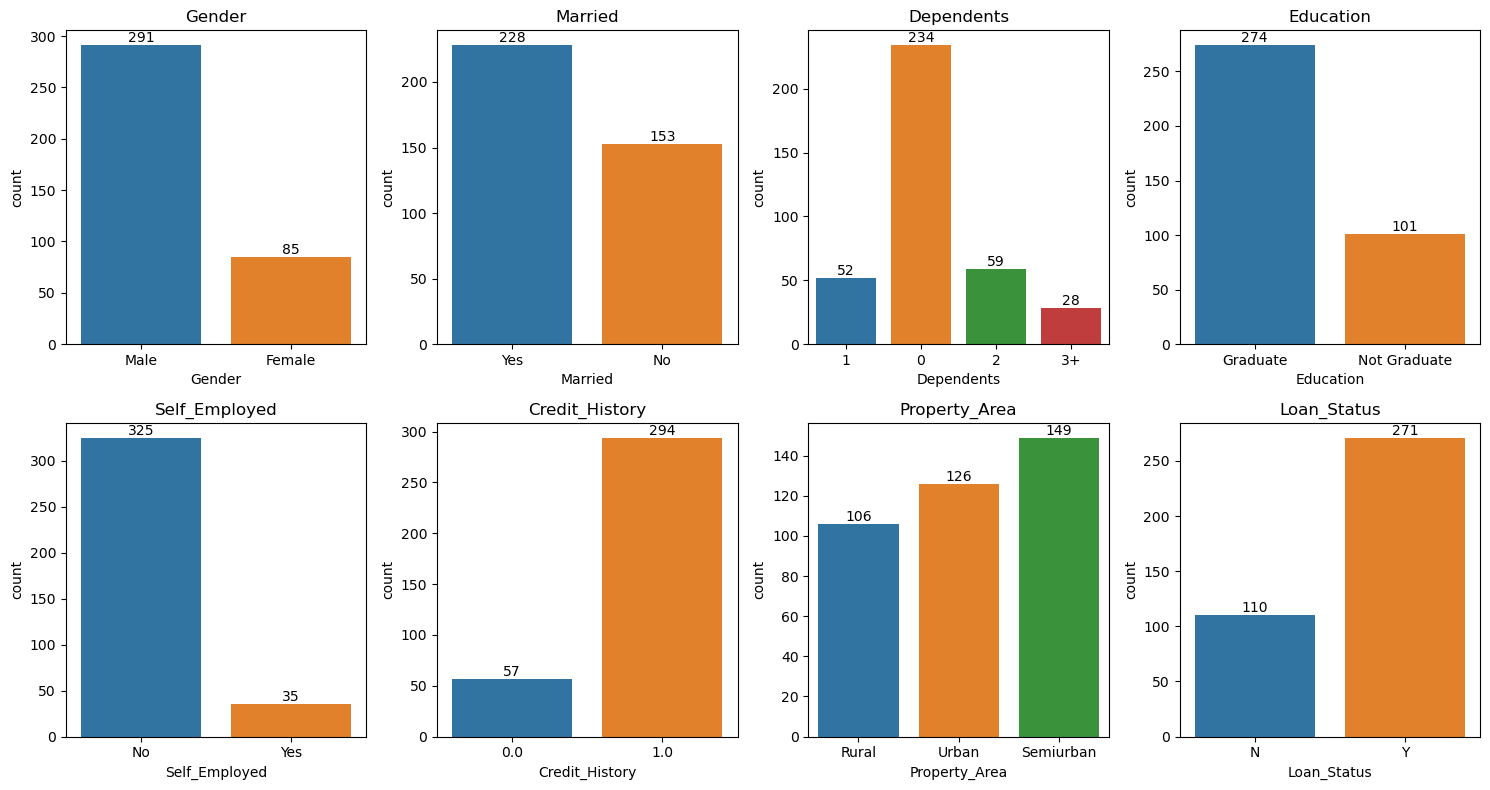

In [11]:
index = 0
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
for i in range(2):
    for j in range(4):
        sns.countplot(data=data, x=categoricals[index], ax=axes[i][j])
        axes[i][j].set_title(categoricals[index])  
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container)
        
        index += 1
plt.tight_layout()
plt.show()

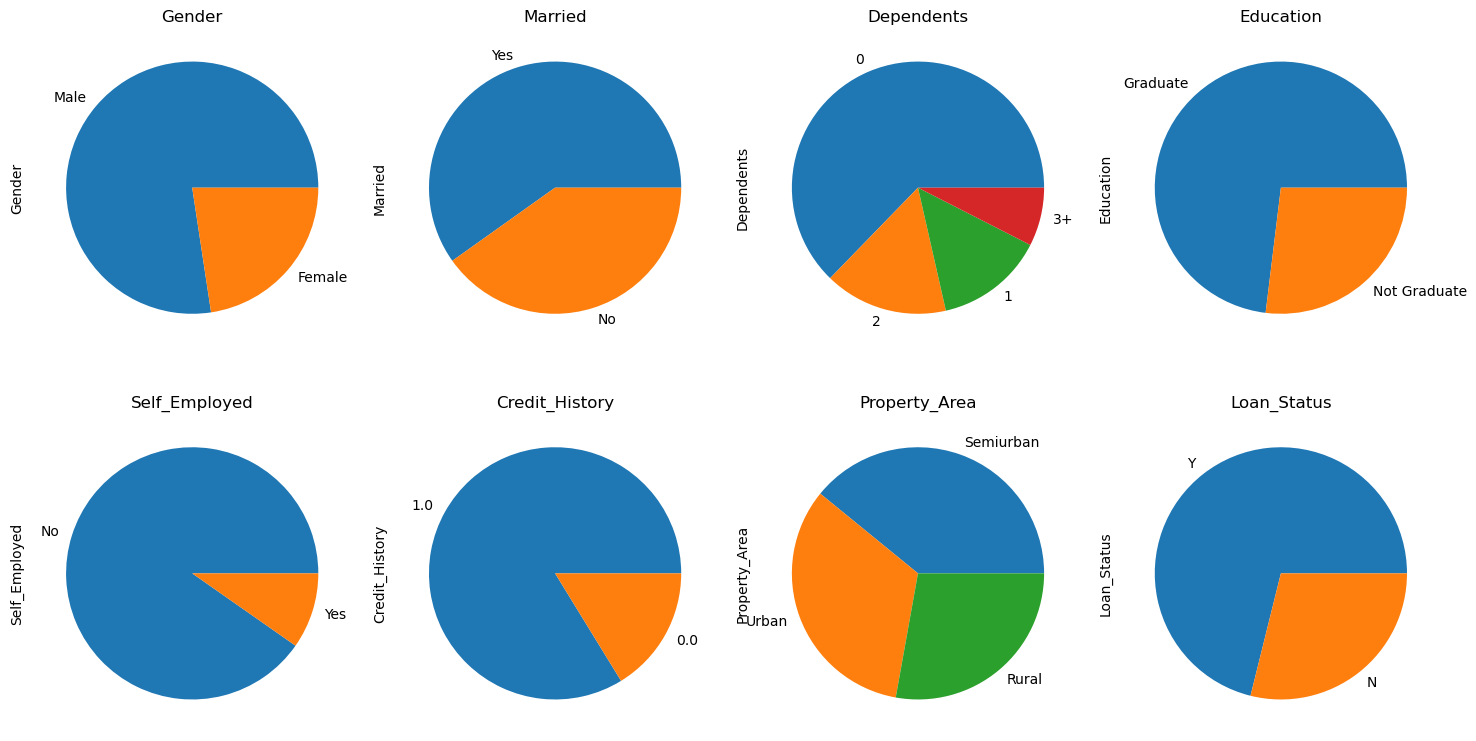

In [12]:
index = 0
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
for i in range(2):
    for j in range(4):
        data[categoricals[index]].value_counts().plot(kind="pie", ax=axes[i][j])
        axes[i][j].set_title(categoricals[index])  
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container)
            
        index += 1
plt.tight_layout()
plt.show()

In [13]:
for i in categoricals[:-1]:
    fig = px.parallel_categories(data[[i, categoricals[-1]]])
    fig.show()

<a id = "4" ></a><br>
## Numerical Variables 

In [14]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequancy")
    plt.title("{} distribution with hist.".format(variable))
    plt.show()

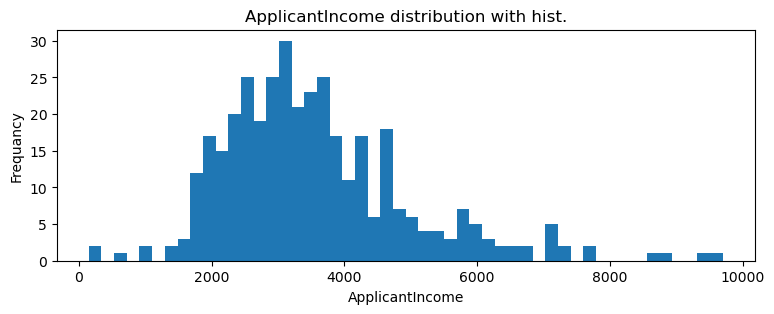

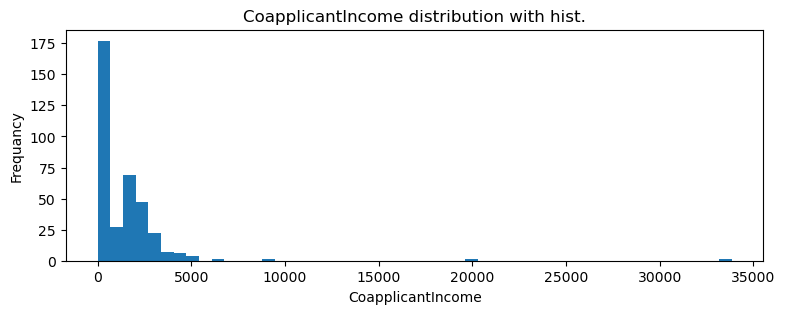

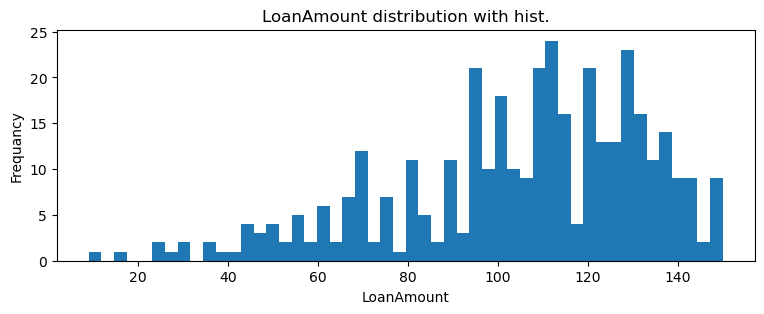

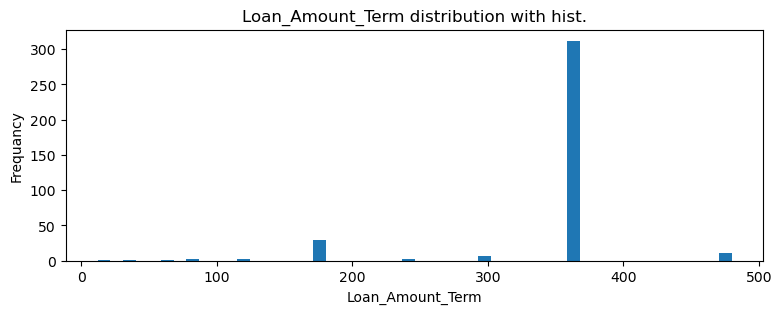

In [15]:
for i in numericals:
    plot_hist(i)

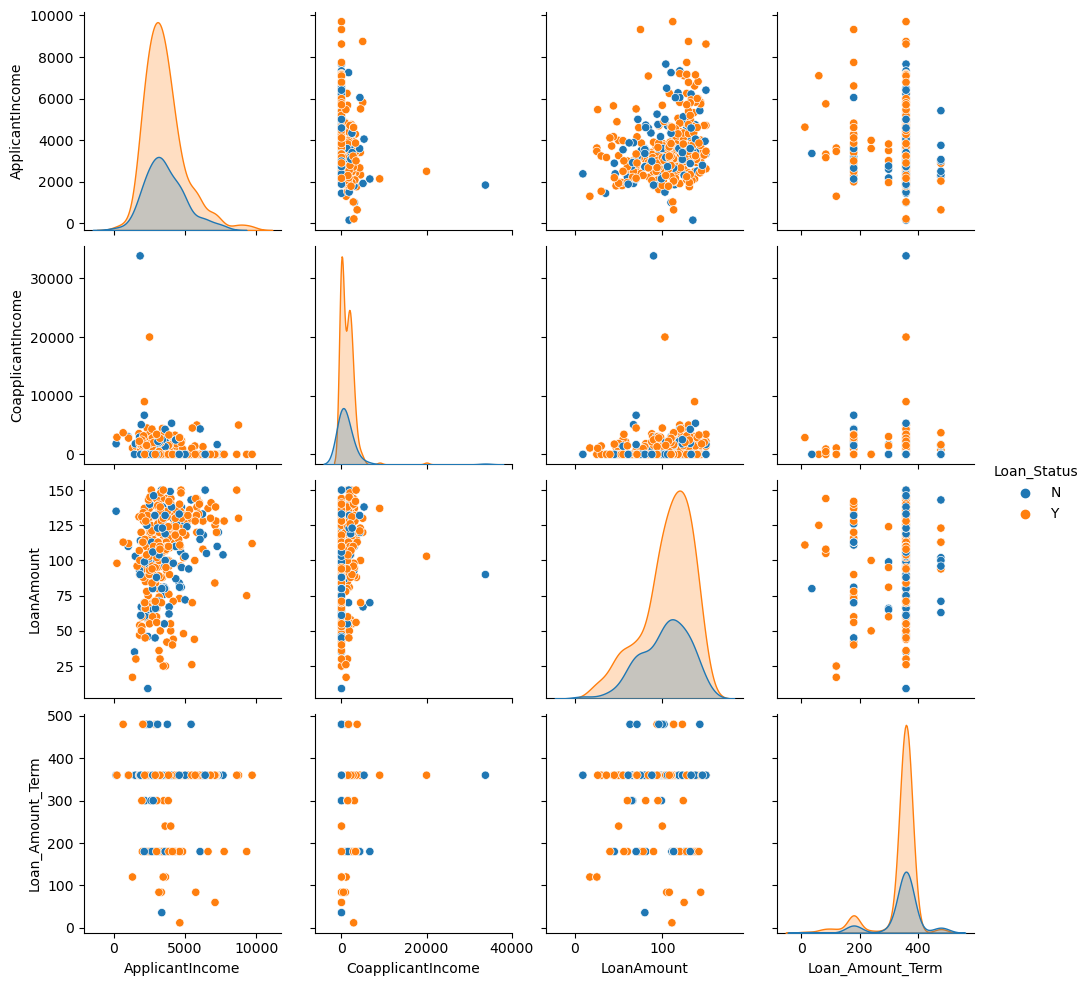

In [16]:
sns.pairplot(data, vars=numericals, hue="Loan_Status")
plt.show()

<a id = "5" ></a><br>
## Mean values for each category

In [17]:
def plots(df, name, nums, axes):
    group = df.groupby(name)
    mean = group[nums].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes)
    for container in axes.containers:
        axes.bar_label(container, rotation=90, label_type="center")
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

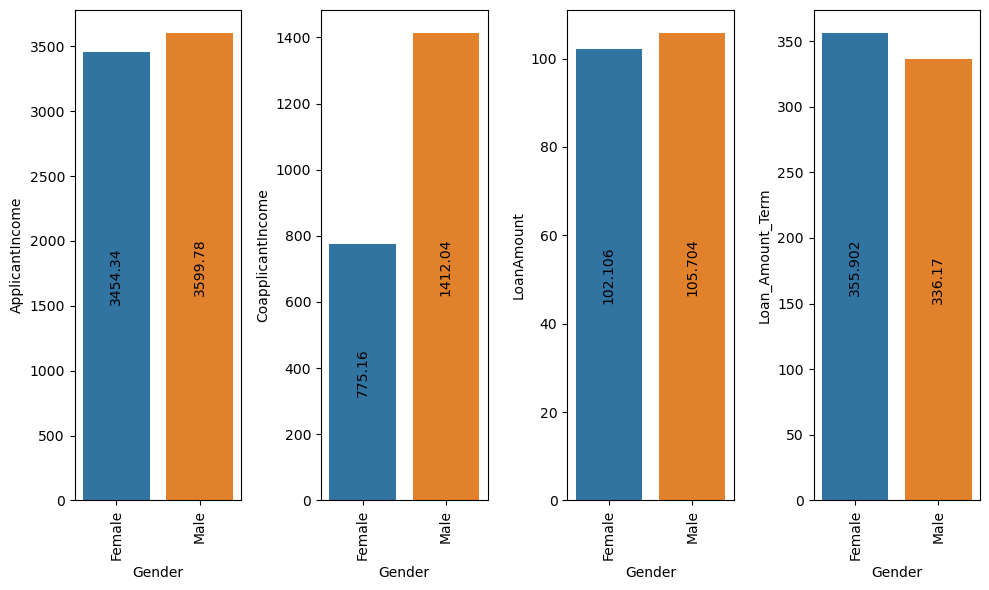

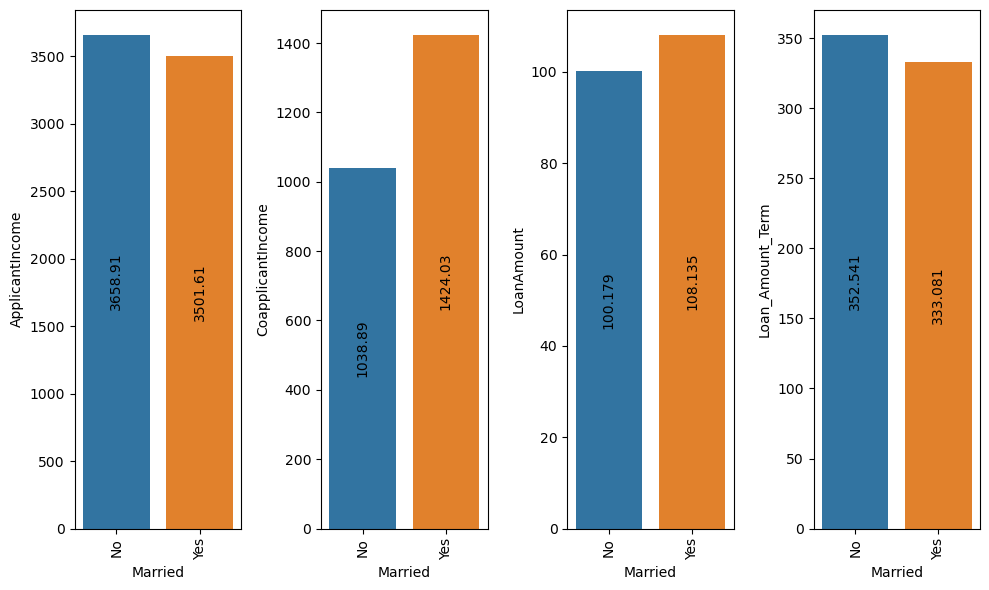

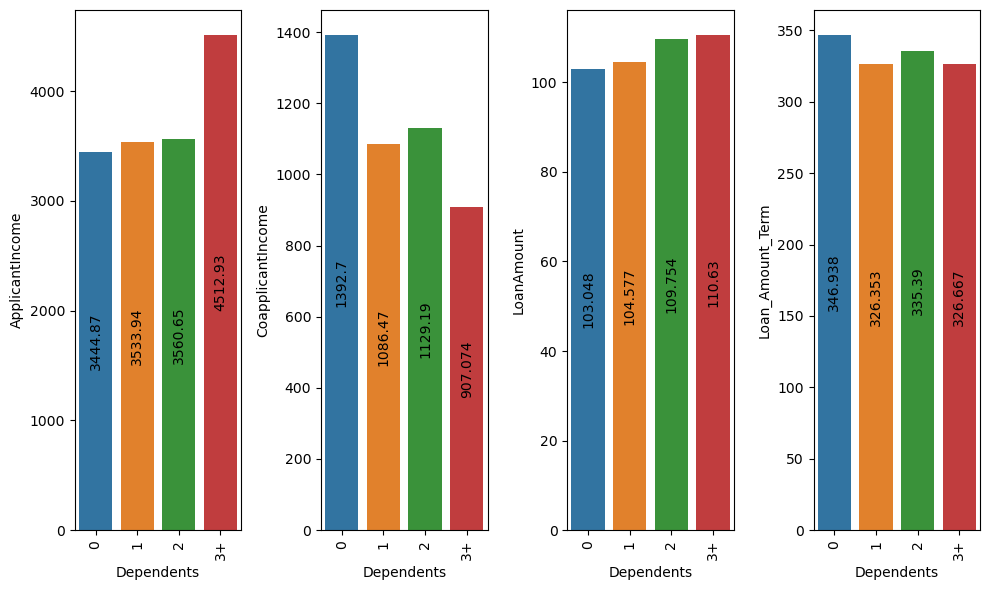

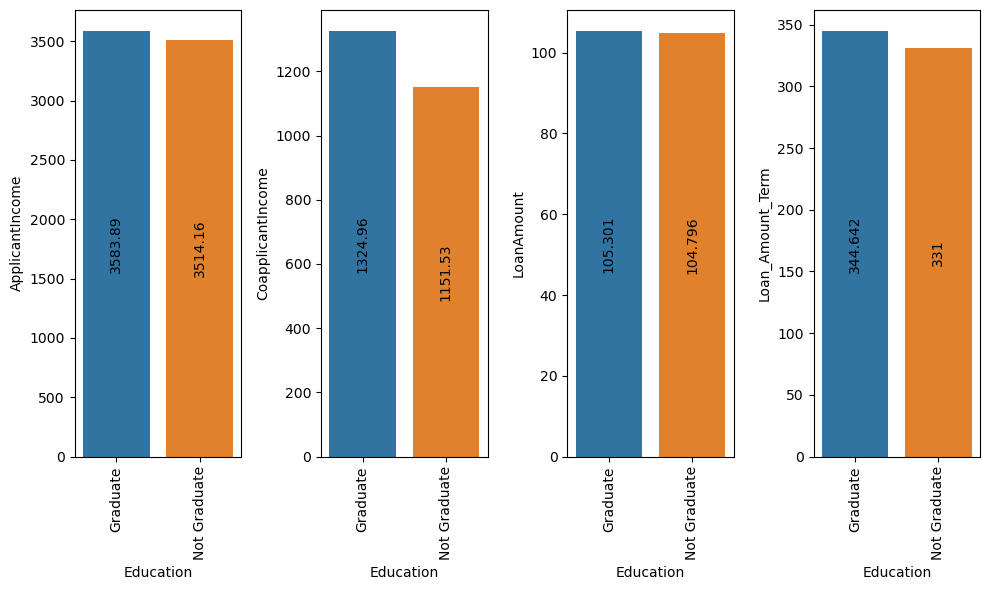

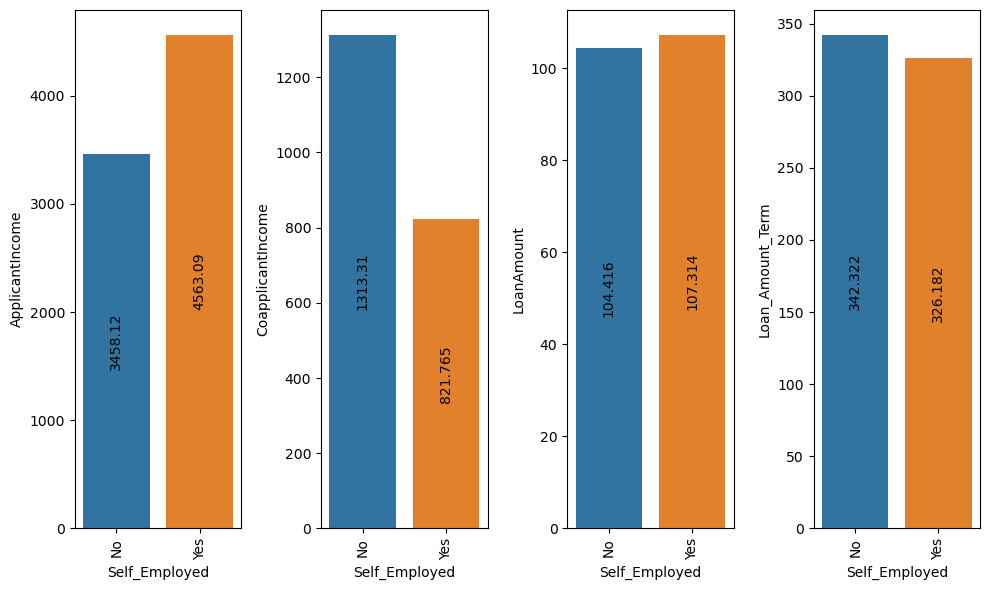

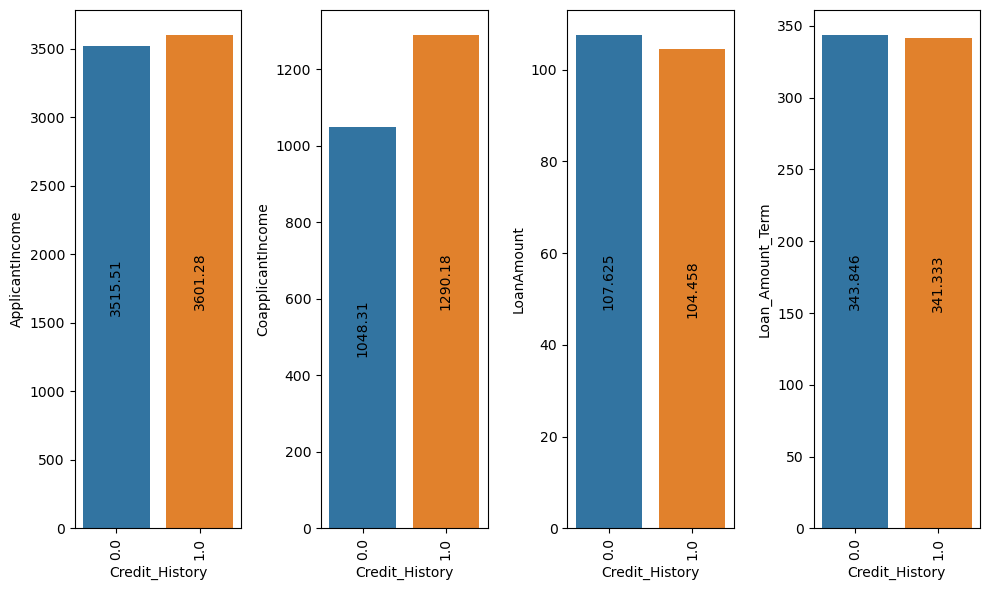

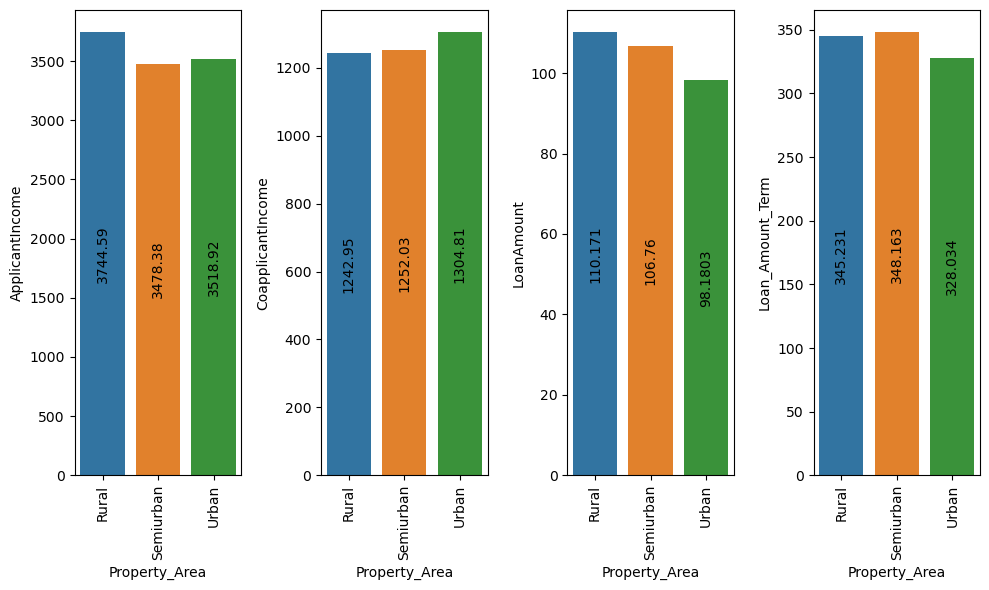

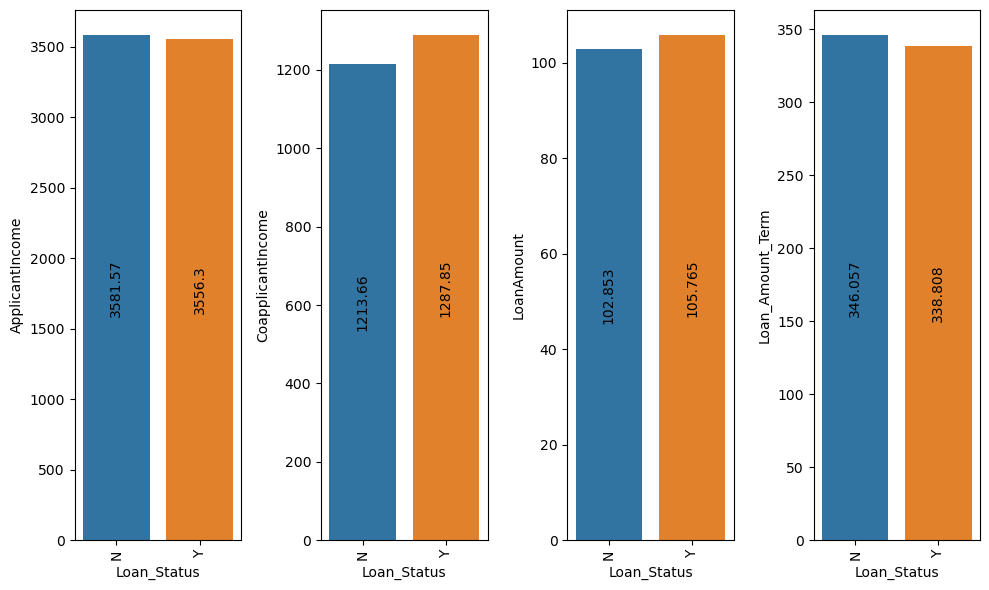

In [18]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 6))
    for k, j in enumerate(numericals):
        plots(data, i, j, axes[k])
    plt.tight_layout()
    plt.show()

<a id = "6" ></a><br>
# Dealing With Missing Values

In [19]:
data.isnull().sum()


Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
categoricals_nulls = ["Gender", "Dependents", "Education", "Credit_History", "Self_Employed"]
for i in categoricals_nulls:
    vals = data[i].mode().values[0]
    data[i].fillna(vals, inplace=True)

In [21]:
numericals_nulls = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for i in numericals_nulls:
    vals = data[i].median()
    data[i].fillna(vals, inplace=True)

<a id = "7" ></a><br>
# Label Encoding

In [22]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [23]:
le = LabelEncoder()
for i in categoricals:
    data[i] = le.fit_transform(data[i])

In [24]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<a id = "8" ></a><br>
## New Labels

### Gender
0 = Male  
1 = Female
### Married
0 = No  
1 = Yes  
### Education
0 = Graduate  
1 = Not Graduate  
### Self_Employed
0 = No  
1 = Yes  
### Property_Area
0 = Rural  
1 = Urban  
2 = Semiurban  
### Loan_Status
0 = N  
1 = Y  

<a id = "9" ></a><br>
# Target Variable Status

In [25]:
data.Loan_Status.value_counts()

1    271
0    110
Name: Loan_Status, dtype: int64

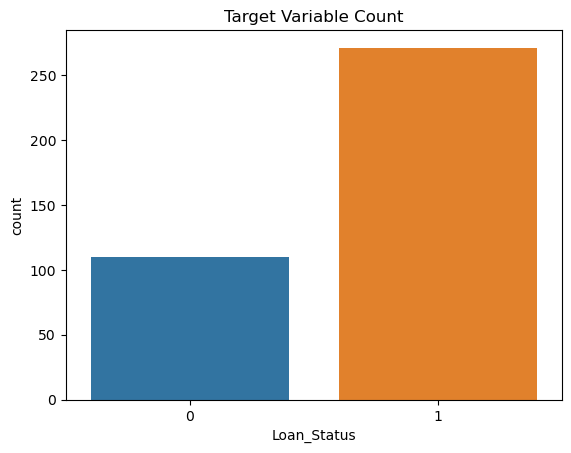

In [26]:
sns.countplot(x = "Loan_Status", data = data).set_title("Target Variable Count")
plt.show()

* Dataset is imbalanced.

<a id = "10" ></a><br>
# Dealing with Imbalancing 

In [27]:
y = data.Loan_Status
X = data.drop("Loan_Status" , axis = 1)

In [28]:
# sampling_strategy için 'minority','not majority' ve 'all' fonksiyonları benzer sonuçları verdi.  
smote = SMOTE(sampling_strategy="all")

X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    271
1    271
Name: Loan_Status, dtype: int64

In [29]:
# Merge the balanced datas
data = pd.concat([X_sm,y_sm], axis = 1)

* We balanced the dataset.

<a id = "11" ></a><br>
# Building Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
y = data.Loan_Status
X = data.drop("Loan_Status" , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

<a id = "12" ></a><br>
## Random Forest 

In [32]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

acc_rf = round(accuracy_score(y_test, y_pred),3)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'),3)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'),3)
f1_rf = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Accuracy Score:", acc_rf)
print("Recall Score:", recall_rf)
print(f"Precision Score: {prec_rf}")
print("F-1 Score:", f1_rf)

Accuracy Score: 0.844
Recall Score: 0.844
Precision Score: 0.859
F-1 Score: 0.843


<a id = "13" ></a><br>
# Explain Prediction by SHAP

In [33]:
import shap 
shap.initjs()

In [34]:
explainer = shap.TreeExplainer(model_rf)

<a id = "14" ></a><br>
## An Individuals Shapley Values

In [35]:
i = 99
observation = X_train.iloc[i]
expected = model_rf.predict([observation])[0]

In [36]:
# Shap values for individual
print(observation)
print("Expected: ", expected)

Gender                  0.0
Married                 0.0
Dependents              2.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      3427.0
CoapplicantIncome       0.0
LoanAmount            138.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           2.0
Name: 157, dtype: float64
Expected:  0


In [37]:

#An Individuals Shapley Values
shap_values = explainer.shap_values(observation)
print(f"{shap_values[expected]}")

[ 0.04068299  0.10048803  0.08167743  0.01232824  0.01363877  0.11145593
  0.07787332  0.06049046 -0.00994141 -0.15111561  0.04396919]


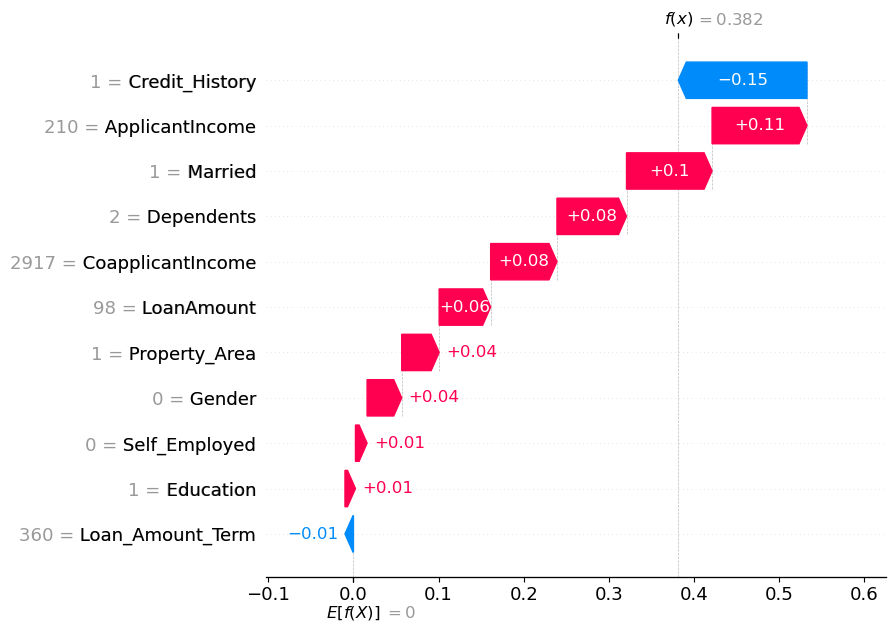

In [38]:
#waterfallplot
base_value = 0
shap_values_matrix = shap.Explanation(values=shap_values, base_values=base_value, data=X_train)
shap.plots.waterfall(shap_values_matrix[expected], max_display=len(X_train.columns))

<a id = "15" ></a><br>
## Whole Dataset Shapley Values

In [39]:
all_shap_values = explainer.shap_values(X_train)

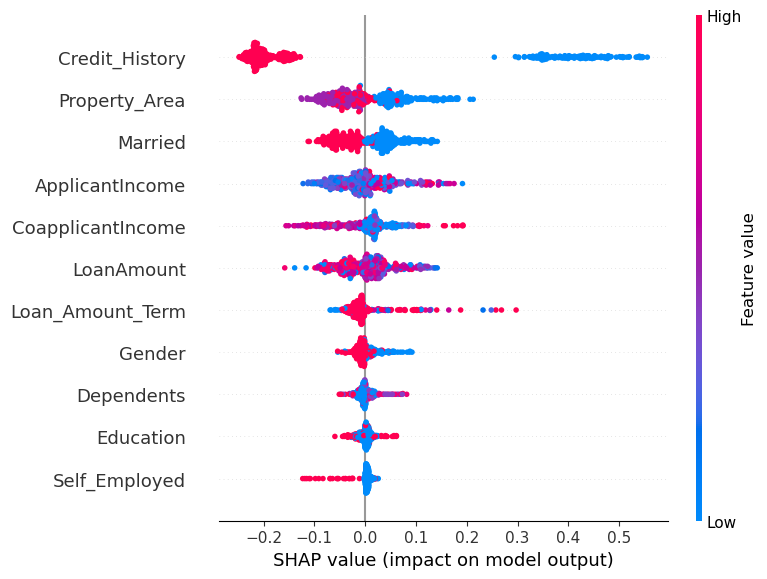

In [40]:
#Summary_plot
shap.summary_plot(all_shap_values[0], features=X_train)